In [1]:
# All necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



pd.set_option('display.max_rows', None)
sns.set_style(style = 'whitegrid')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Lets separate the different types of features
data['MSSubClass'] = data['MSSubClass'].astype(str)
temporal_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype in ['int64', 'float64'] and feature not in temporal_features and feature != 'SalePrice']
target = data['SalePrice']

# Categorical Feature Exploration


<AxesSubplot:>

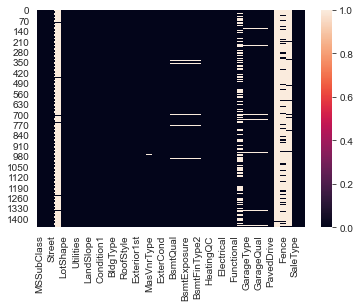

In [5]:
# Let's look at the the distribution of null values.
categorical_df = data[categorical_features]
sns.heatmap(categorical_df.isnull())

### Initial Statistics

In [6]:
categorical_df_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in categorical_features:
    tmp['column'] = [c]
    tmp['values'] = [categorical_df[c].unique()]
    tmp['values_count_incna'] = len(list(categorical_df[c].unique()))
    tmp['values_count_nona'] = int(categorical_df[c].nunique())
    tmp['num_miss'] = categorical_df[c].isnull().sum()
    tmp['pct_miss'] = (categorical_df[c].isnull().sum()/ len(categorical_df)).round(3)*100
    categorical_df_stats = categorical_df_stats.append(tmp)
    
# Let's do an Ascending sort on the Numboer of Distinct Categories for each categorical Variables
categorical_df_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = False)

# And set the index to Column Names
categorical_df_stats.set_index('column', inplace = True)

categorical_df_stats

,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25,25,0,0.0
Exterior2nd,"[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...",16,16,0,0.0
Exterior1st,"[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...",15,15,0,0.0
MSSubClass,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",15,15,0,0.0
Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9,9,0,0.0
SaleType,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...",9,9,0,0.0
Condition2,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...",8,8,0,0.0
HouseStyle,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...",8,8,0,0.0
RoofMatl,"[CompShg, WdShngl, Metal, WdShake, Membran, Ta...",8,8,0,0.0


#### Quick Impressions from Initial Statistics

1. There are 5 features that have 47% or greater missing values: [PoolQC, MiscFeature, Alley, Fence, FireplaceQu]
2. There are 3 features with cardinality of 15 or greater: [Neighborhood, Exterior2nd, Exterior1st]
3. There are 17 features with categories that aren't present (might show up in test data).

### Distribution Plots

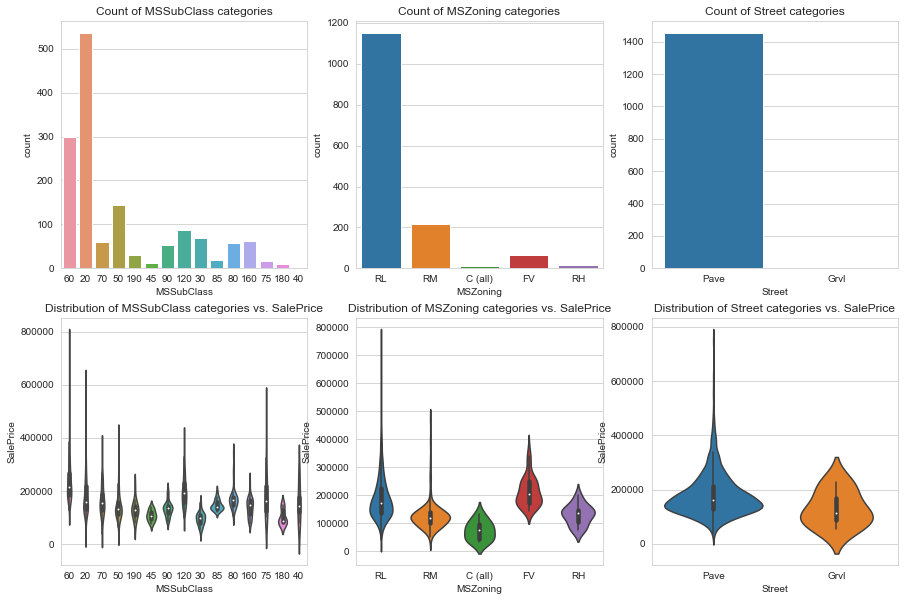

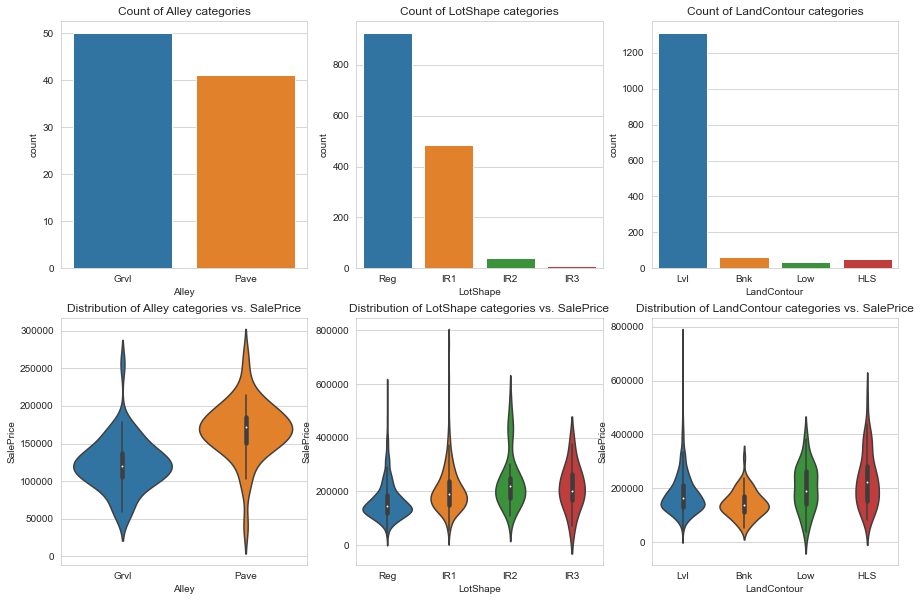

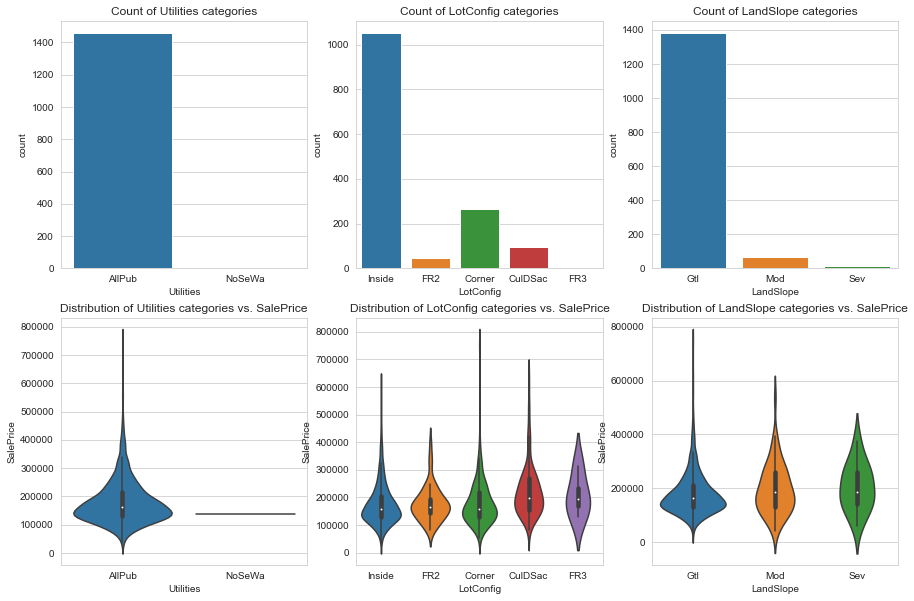

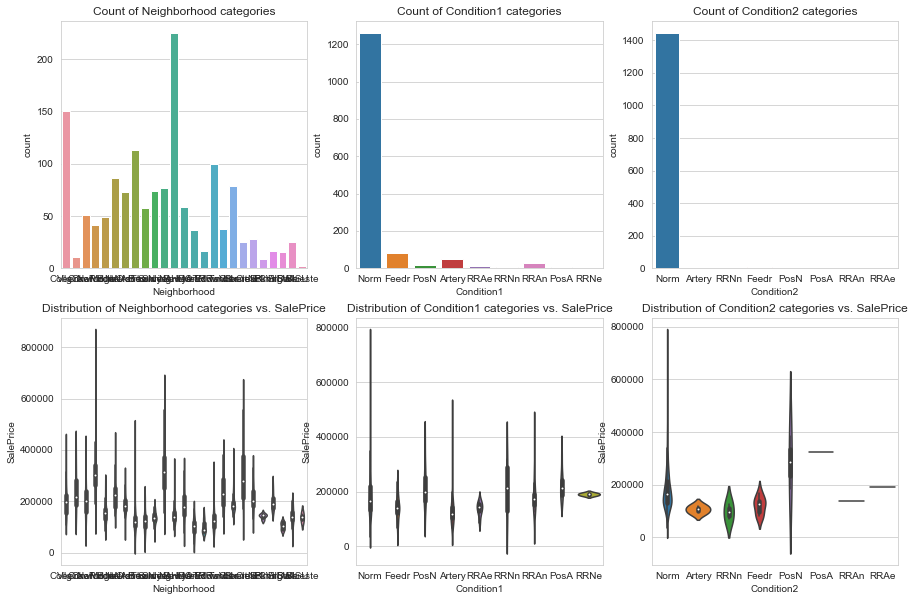

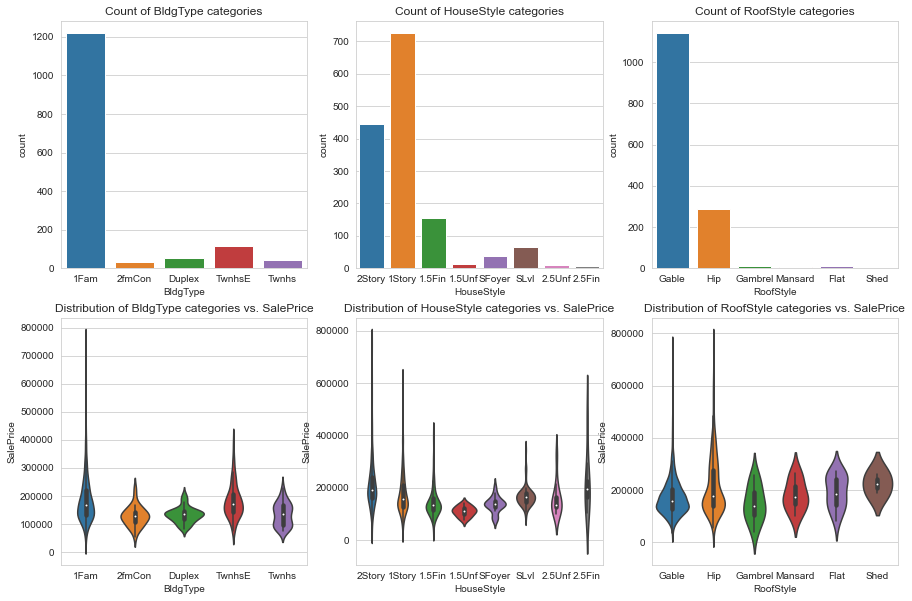

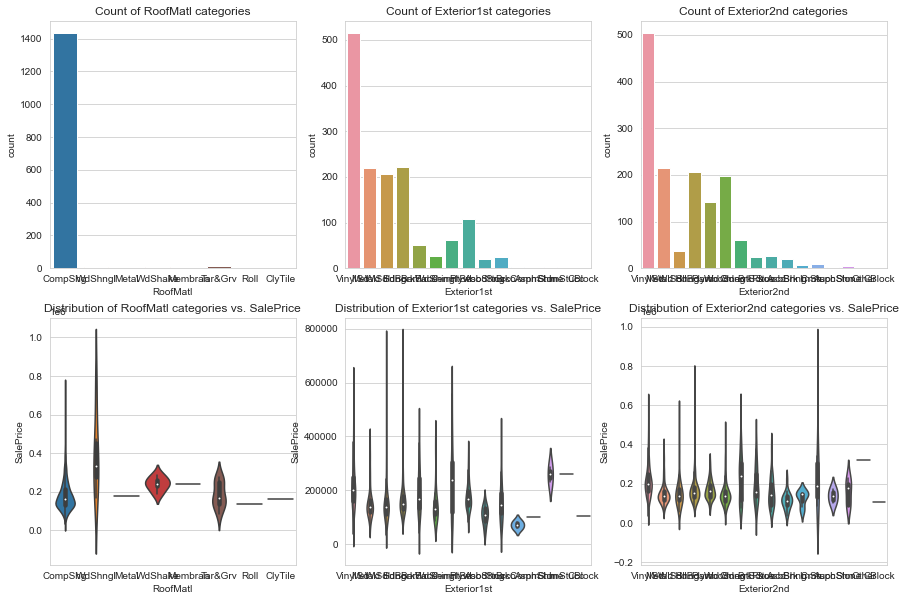

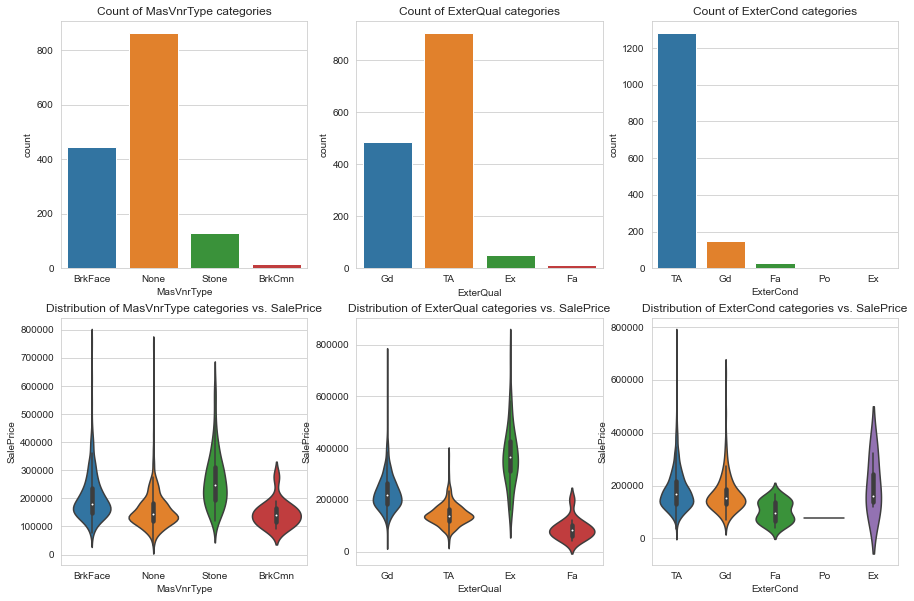

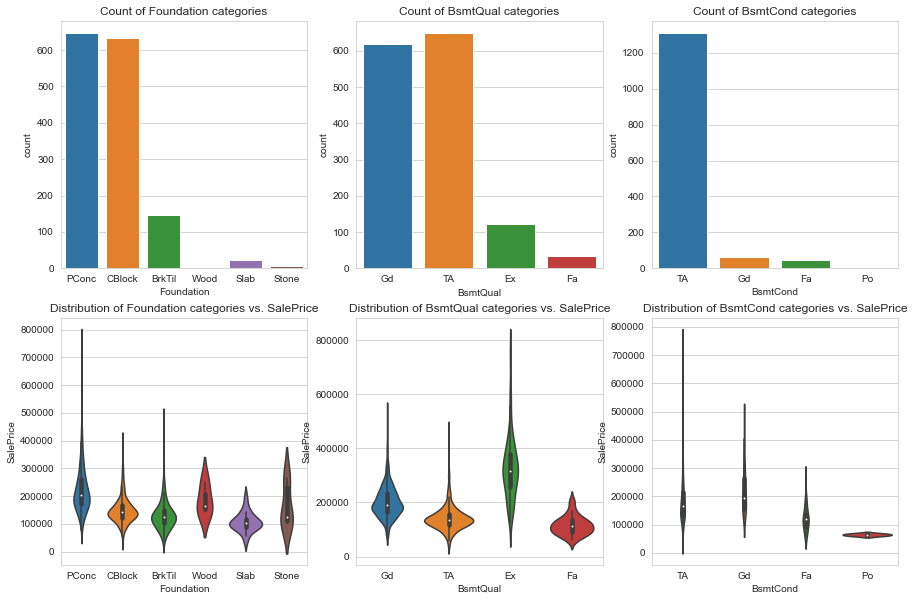

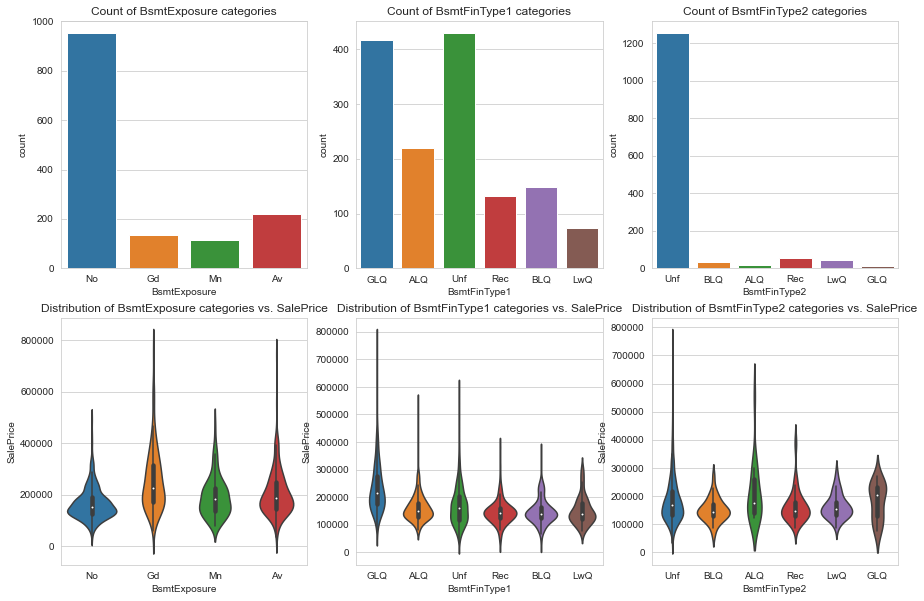

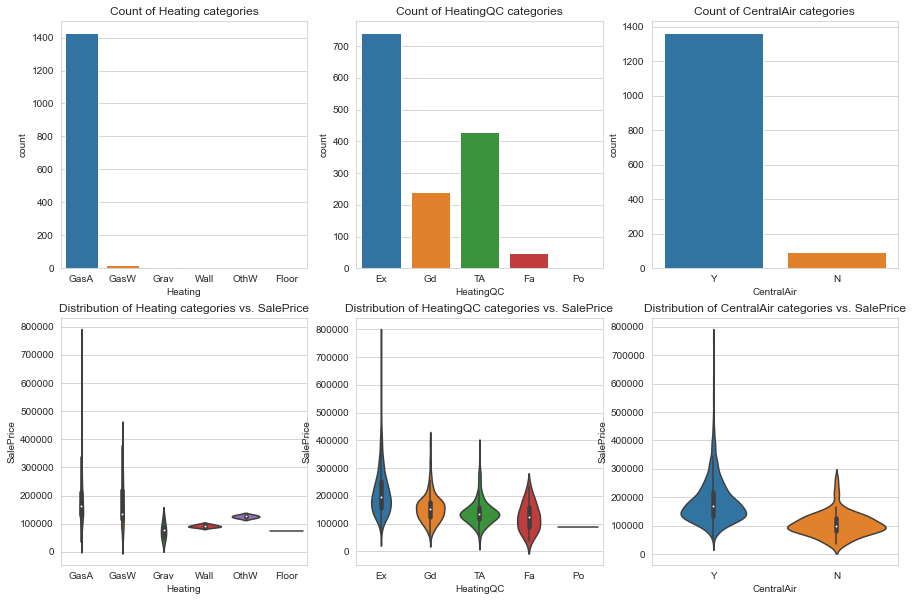

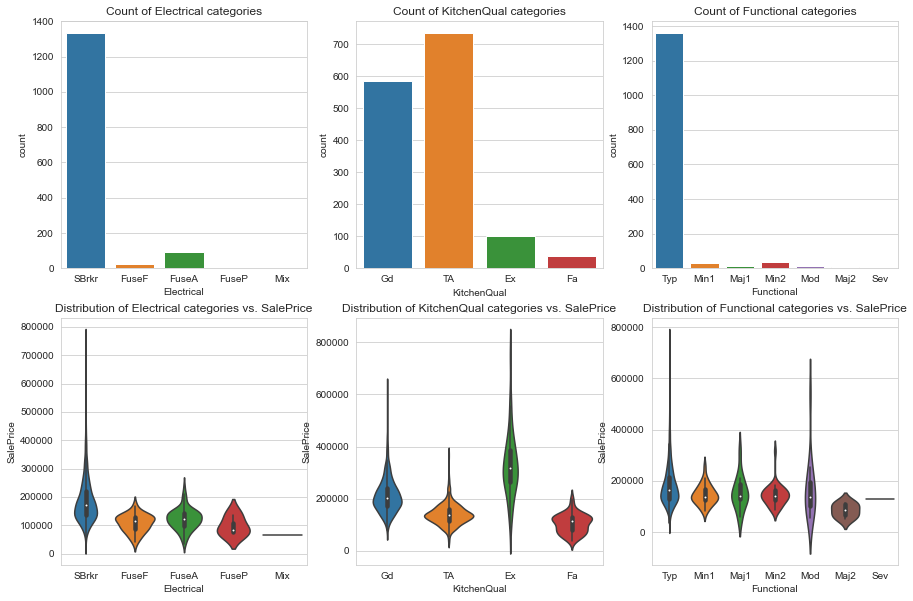

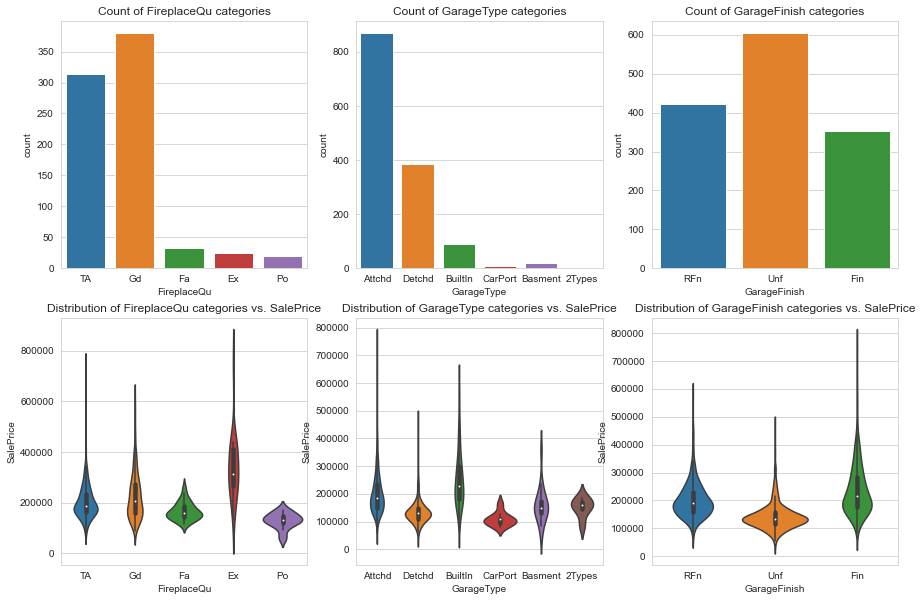

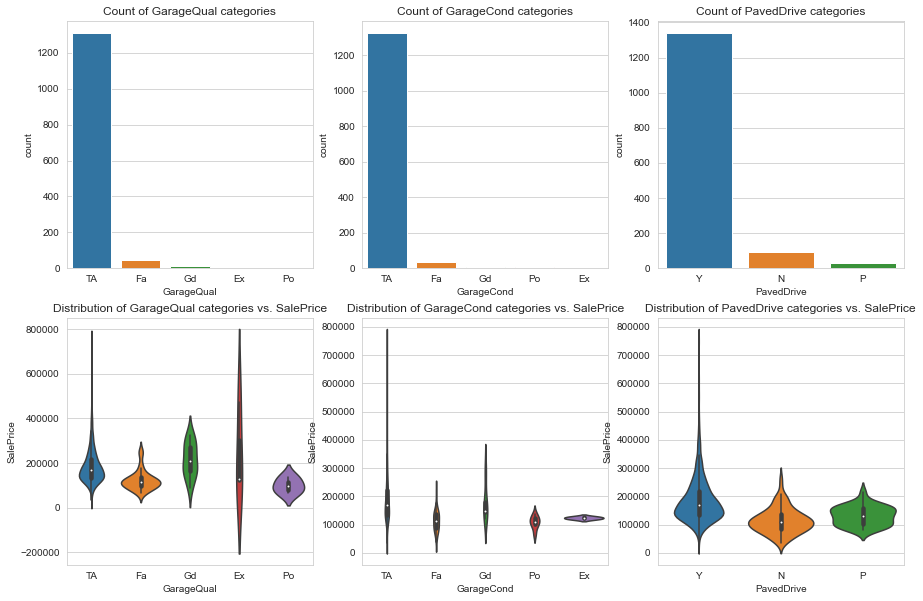

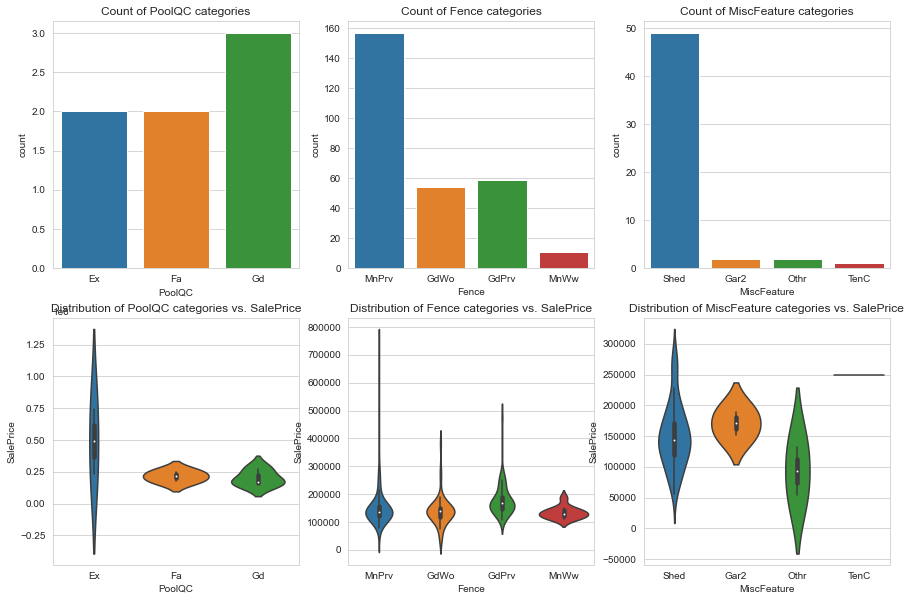

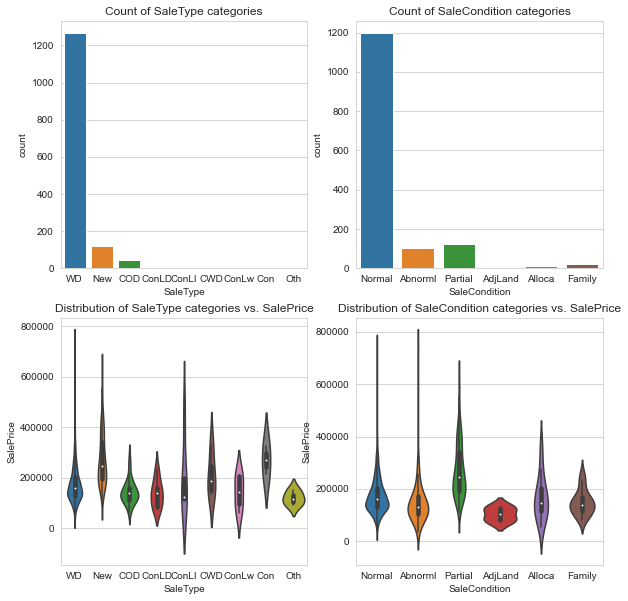

In [7]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(categorical_df.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(2,3,ix)
            ax1.set_title('Count of {} categories'.format(c))
            sns.countplot(data = data, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            ax2.set_title('Distribution of {} categories vs. SalePrice'.format(c))
            sns.violinplot(data=data, x=c, y='SalePrice', ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

#### Quick Impressions from distribution plots

1. There are many features where there is a dominating category. Might have to aggregate the other categories for that feature.
2. Some features are havily skewed.
3. Some categories in features have very wide distributions and others have very compact distributions.
4. MSSubClass, Exterior1st, Exterior2nd, and Neighborhood have too many categories to look at in this format. We will have to do further analysis on them


# Numeric Feature Exploration

In [8]:
numeric_df = data[numeric_features]

In [9]:
numeric_df.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,421.610009,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,1.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [16]:
numeric_df_stats = pd.DataFrame(columns = ['column', 'mean', 'std', 'min', 'max', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in numeric_features:
    tmp['column'] = [c]
    tmp['mean'] = numeric_df[c].mean()
    tmp['std'] = numeric_df[c].std()
#     tmp['25%'] = np.percentile(numeric_df[c], 25)
#     tmp['50%'] = np.percentile(numeric_df[c], 50)
#     tmp['75%'] = np.percentile(numeric_df[c], 75)
    tmp['max'] = max(numeric_df[c])
    tmp['min'] = min(numeric_df[c])
    tmp['num_miss'] = numeric_df[c].isnull().sum()
    tmp['pct_miss'] = (numeric_df[c].isnull().sum() / len(numeric_df)).round(3)*100
    numeric_df_stats = numeric_df_stats.append(tmp)
    
# Let's do an Ascending sort on the percent missing for each categorical Variables
numeric_df_stats.sort_values(by = 'pct_miss', inplace = True, ascending = False)

# And set the index to Column Names
numeric_df_stats.set_index('column', inplace = True)

numeric_df_stats

,mean,std,min,max,num_miss,pct_miss
column,,,,,,
LotFrontage,70.049958,24.284752,21.0,313.0,259,17.7
MasVnrArea,103.685262,181.066207,0.0,1600.0,8,0.5
Id,730.500000,421.610009,1,1460,0,0.0
HalfBath,0.382877,0.502885,0,2,0,0.0
PoolArea,2.758904,40.177307,0,738,0,0.0
ScreenPorch,15.060959,55.757415,0,480,0,0.0
3SsnPorch,3.409589,29.317331,0,508,0,0.0
EnclosedPorch,21.954110,61.119149,0,552,0,0.0
OpenPorchSF,46.660274,66.256028,0,547,0,0.0


### Distribution Plots

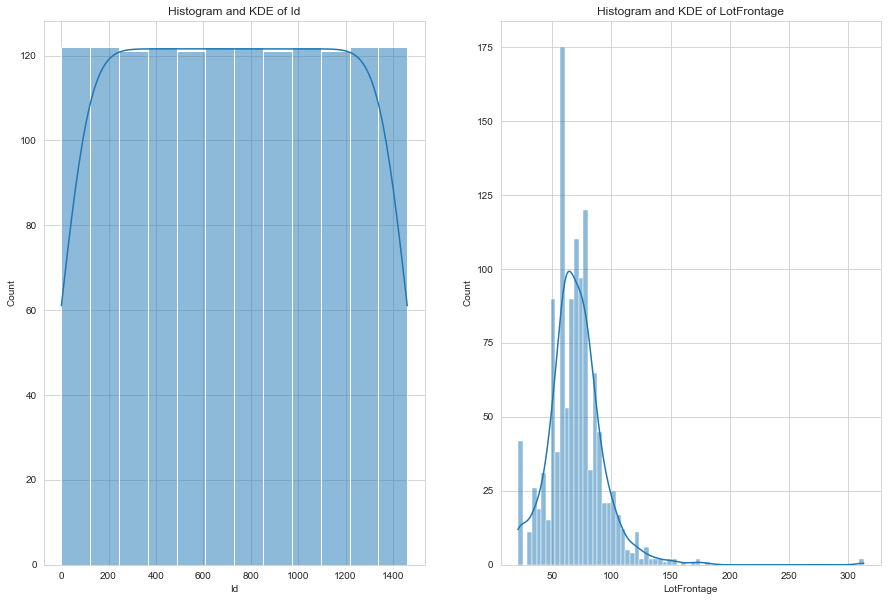

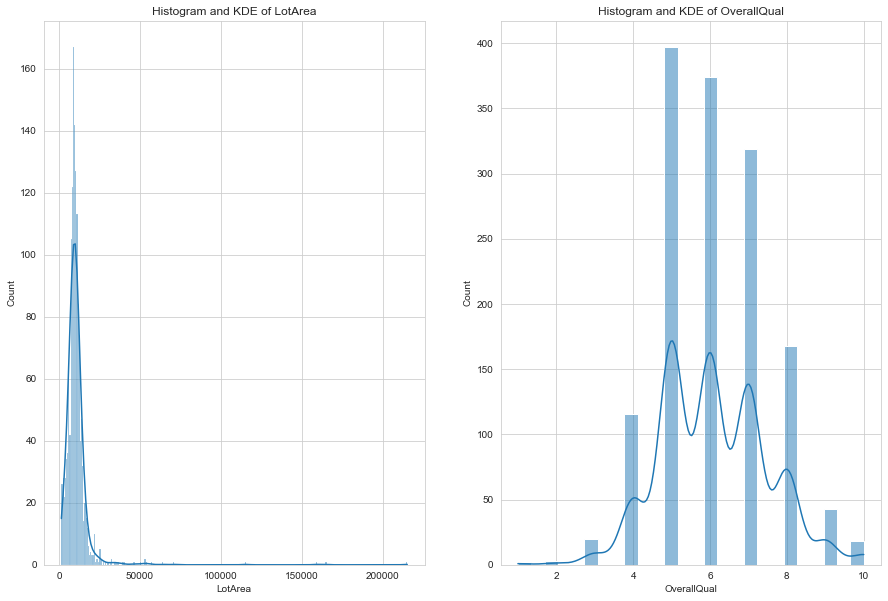

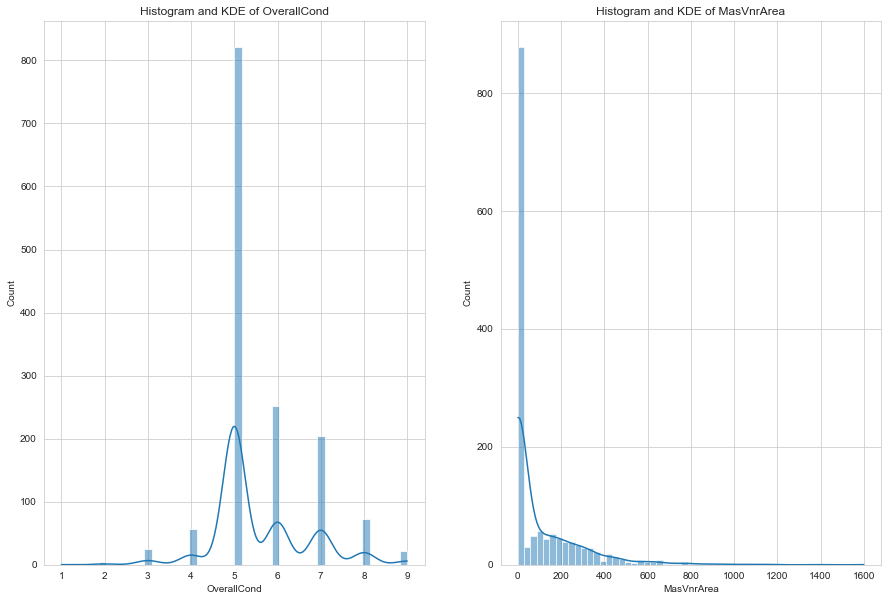

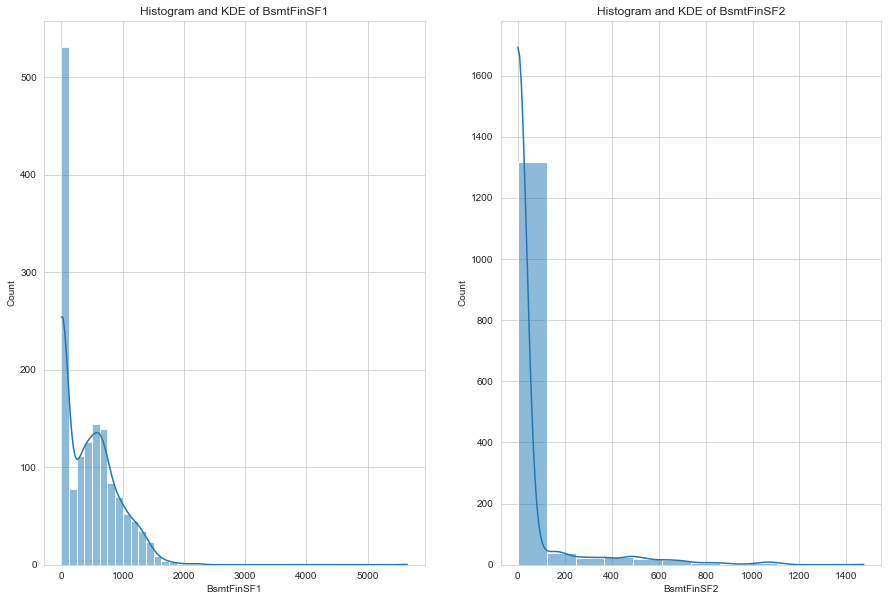

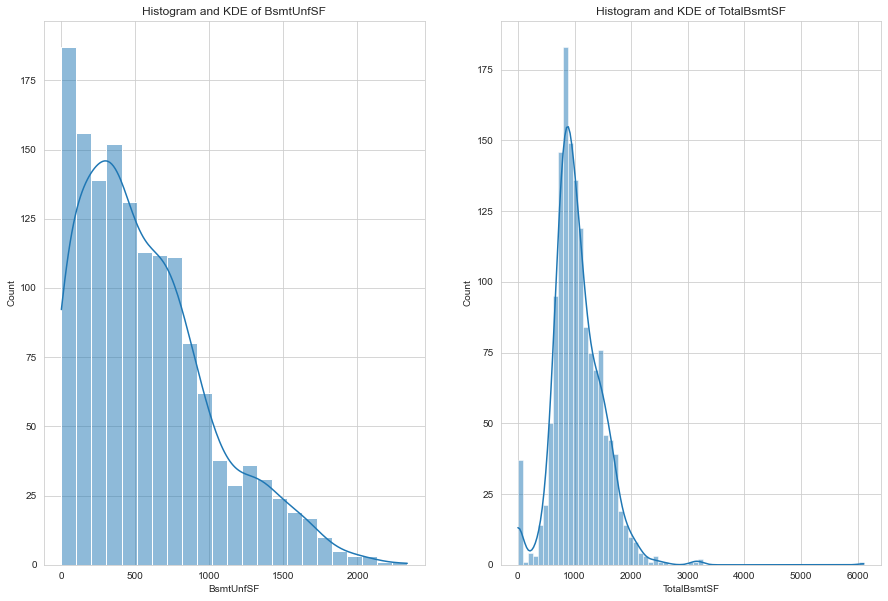

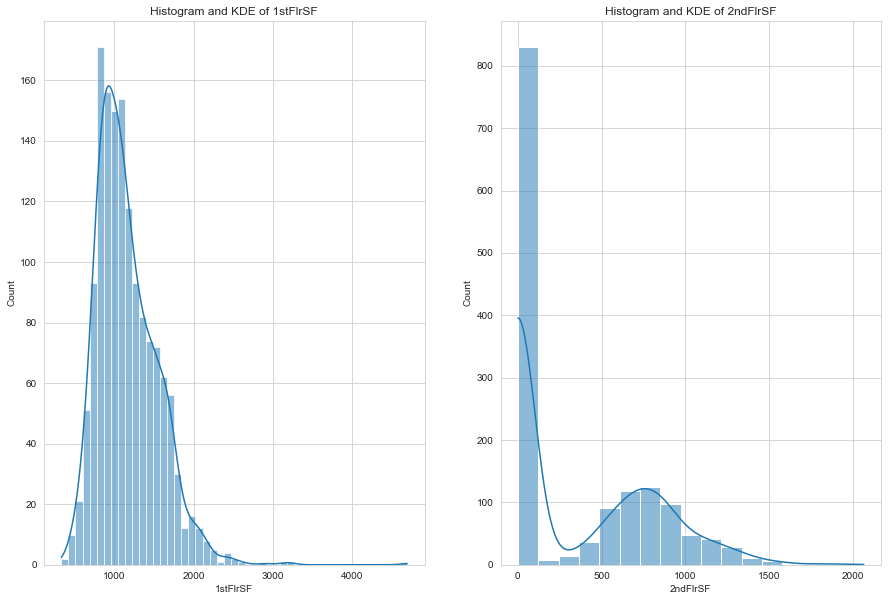

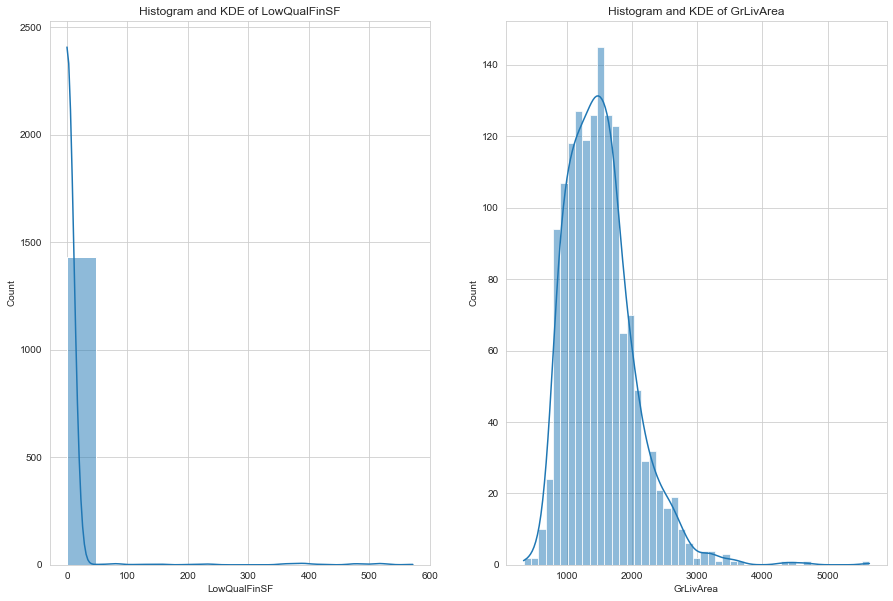

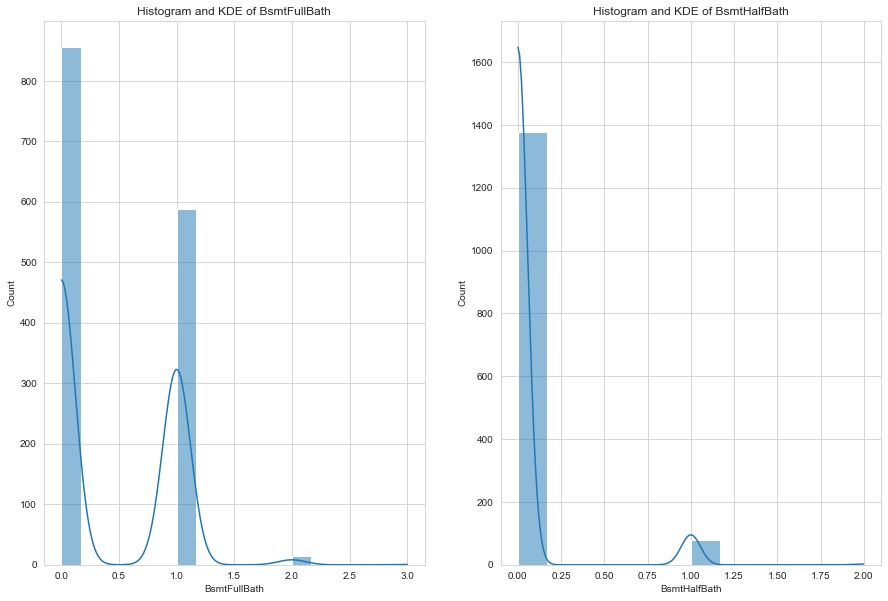

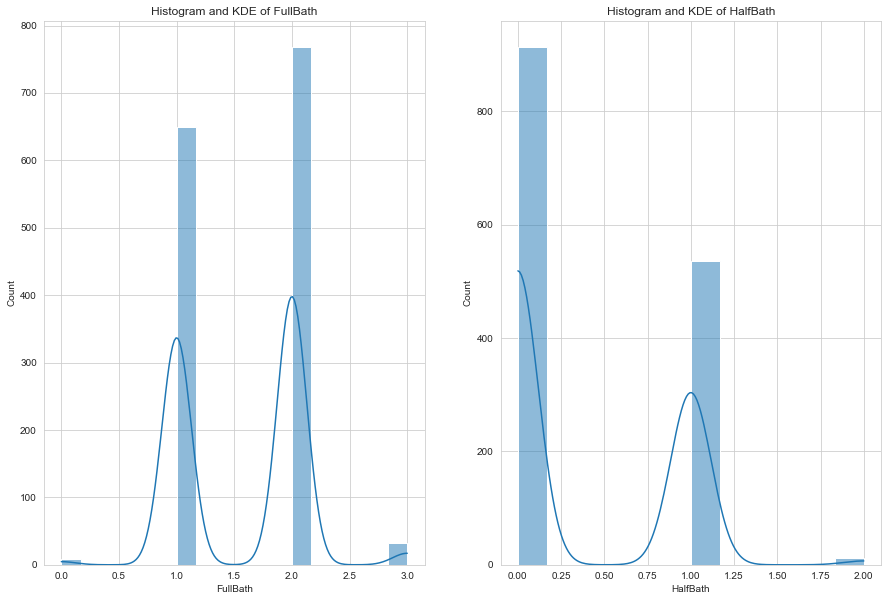

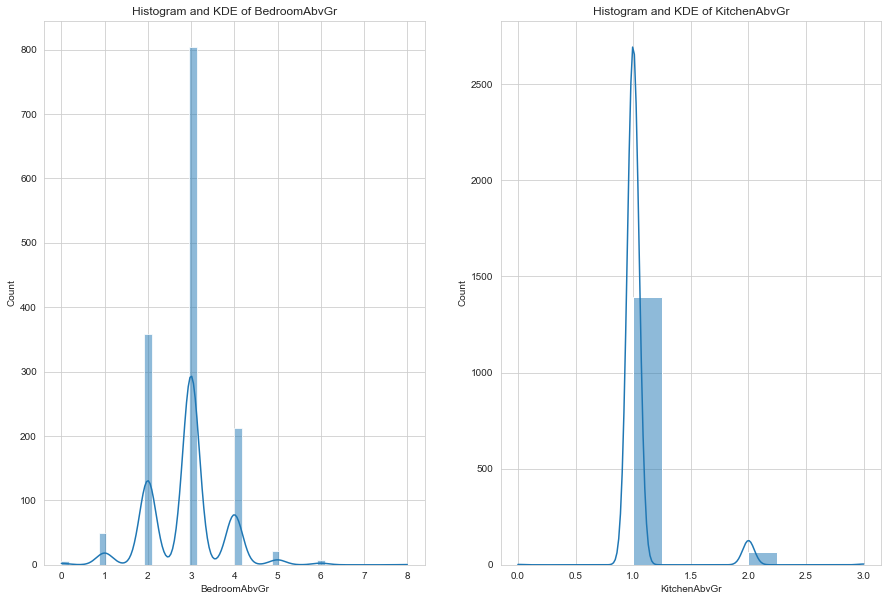

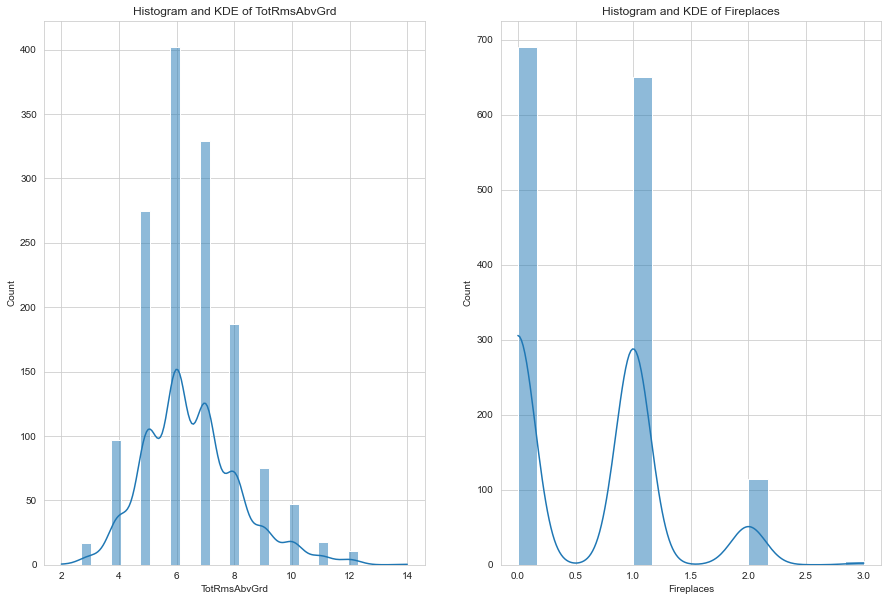

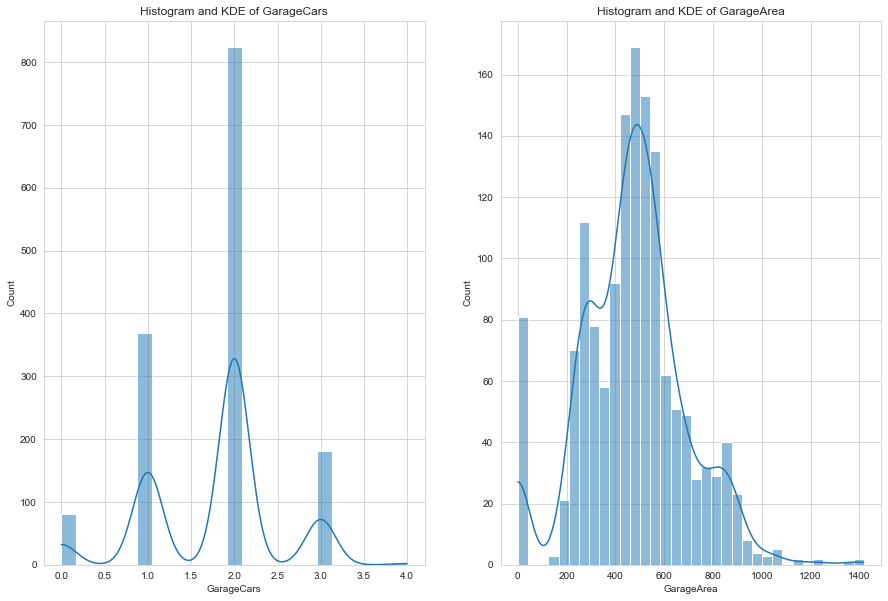

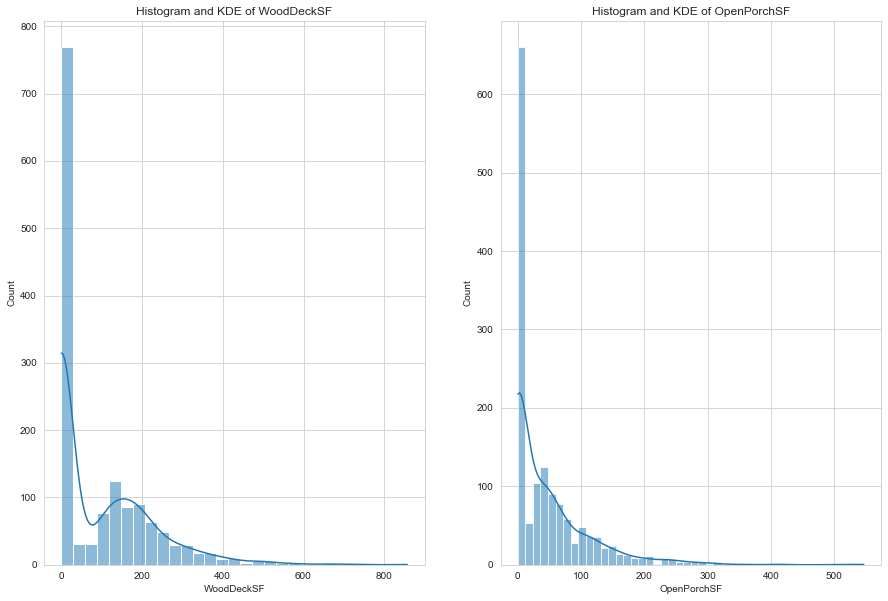

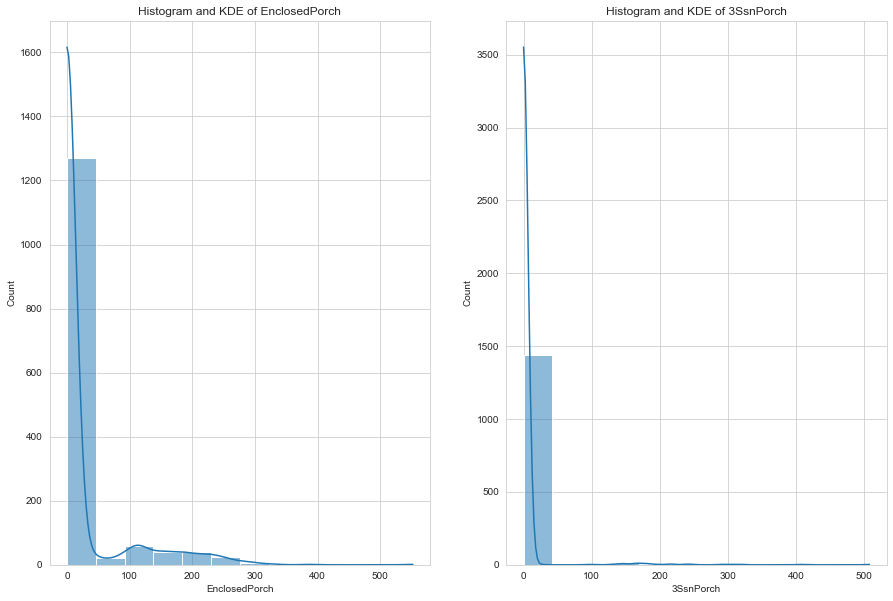

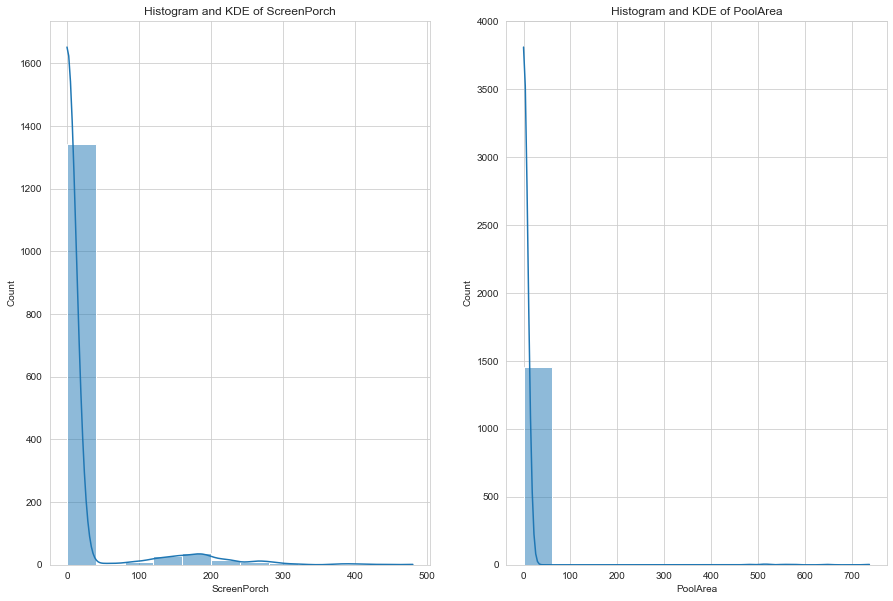

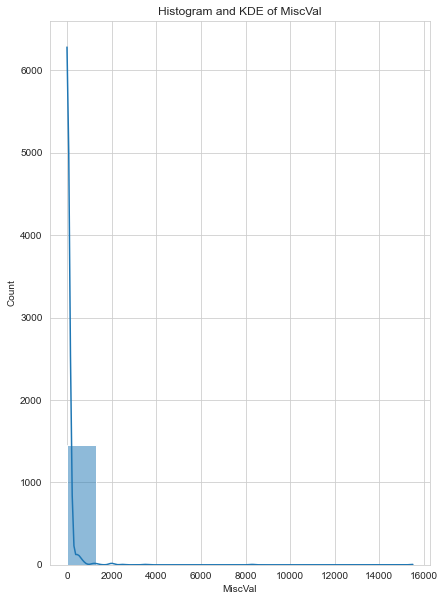

In [14]:
cols = list(numeric_df.columns) 
for i in range(0, len(cols), 2):
    fig = plt.figure(figsize = (15, 10))
    ax1 = plt.subplot(1, 2, 1)
    ax1.set_title('Histogram and KDE of {}'.format(cols[i]))
    sns.histplot(x=cols[i], data=numeric_df, kde=True, ax=ax1)
    if i + 1 < len(cols):
        ax2 = plt.subplot(1, 2, 2)
        ax2.set_title('Histogram and KDE of {}'.format(cols[i+1]))
        sns.histplot(x=cols[i+1], data=numeric_df, kde=True, ax=ax2)
#     if ix <= 2:
#         if c != 'SalePrice':
#             ax = plt.subplot(1, 2, ix)
#             ax.set_title('Histogram and KDE of {}'.format(c))
#             sns.displot(x=c, data=numeric_df, kde=True)
# #             ax2 = fig.add_subplot(2,3,ix+3)
# #             ax2.set_title('Distribution of {} categories vs. SalePrice'.format(c))
# #             sns.violinplot(data=data, x=c, y='SalePrice', ax=ax2)
            
#     ix = ix +1
#     if ix == 3: 
#         fig = plt.figure(figsize = (15,10))
#         ix = 1


# # for c in numeric_features:
# #     sns.displot(x=c, data=numeric_df, kde=True)
# #     plt.show()

#### Notes on numeric distribution plots

1. There are many features where a zero value is equivalent to a missing value, so we will need to take care of those.
2. For some features, a zero value is actually tied to some meaning. 
3. There are many features that are not Guassian distributed.


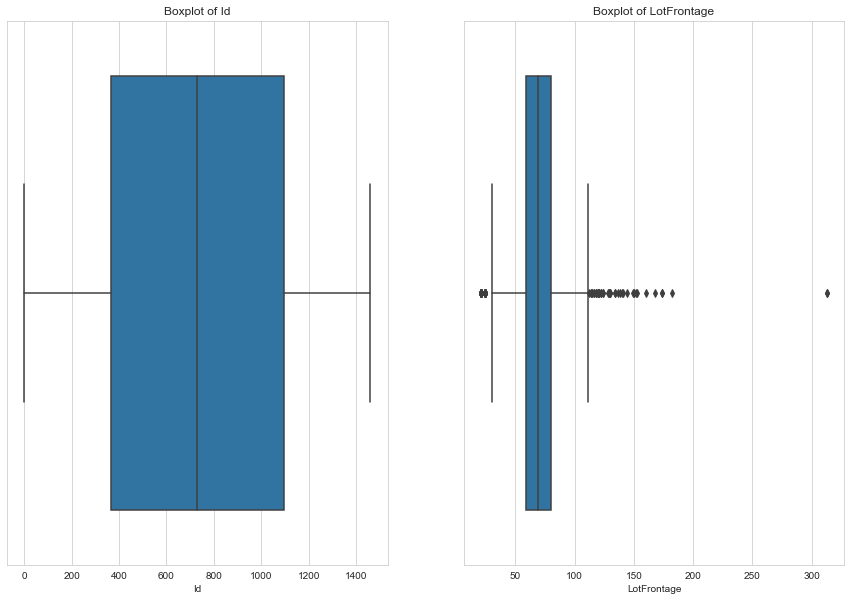

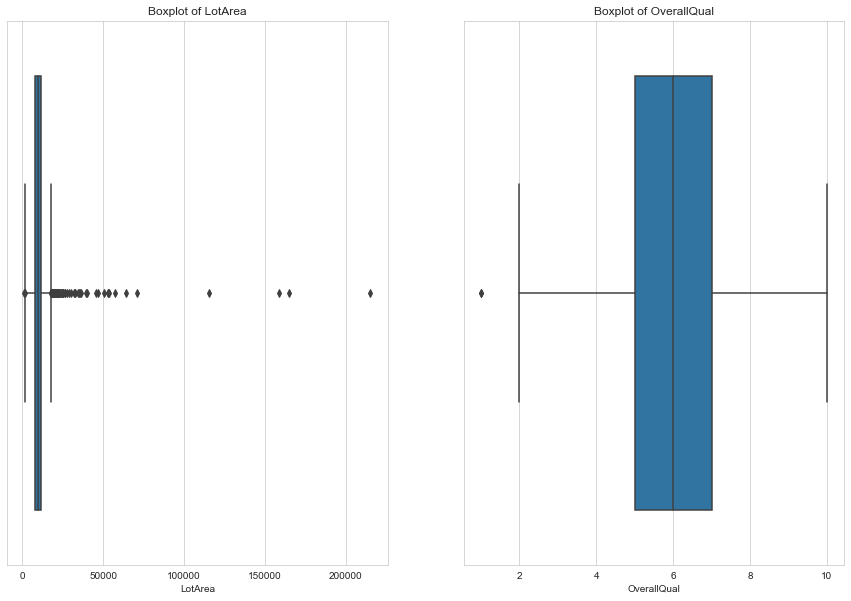

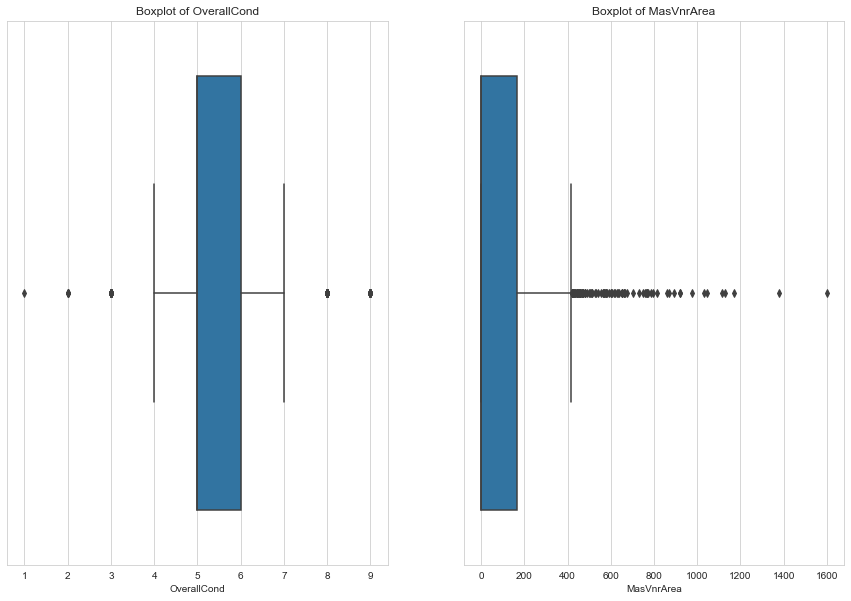

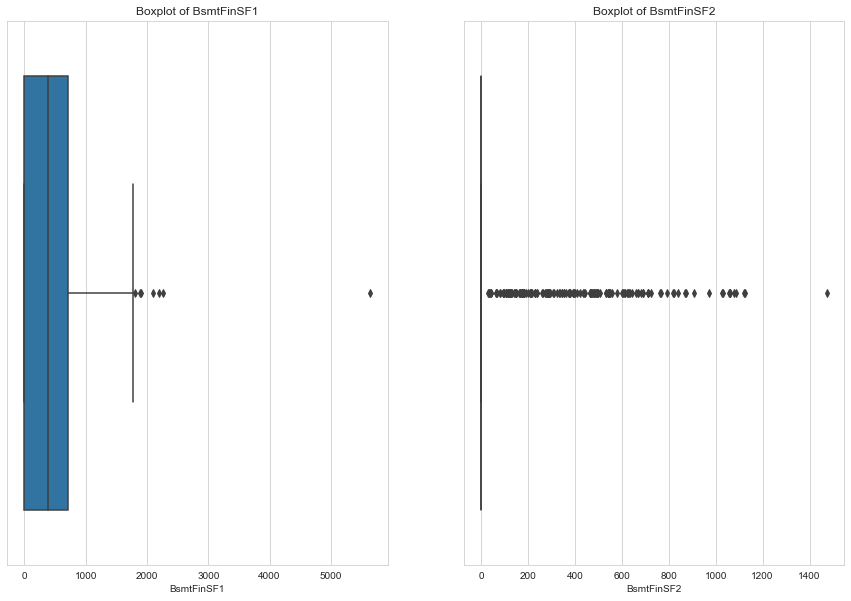

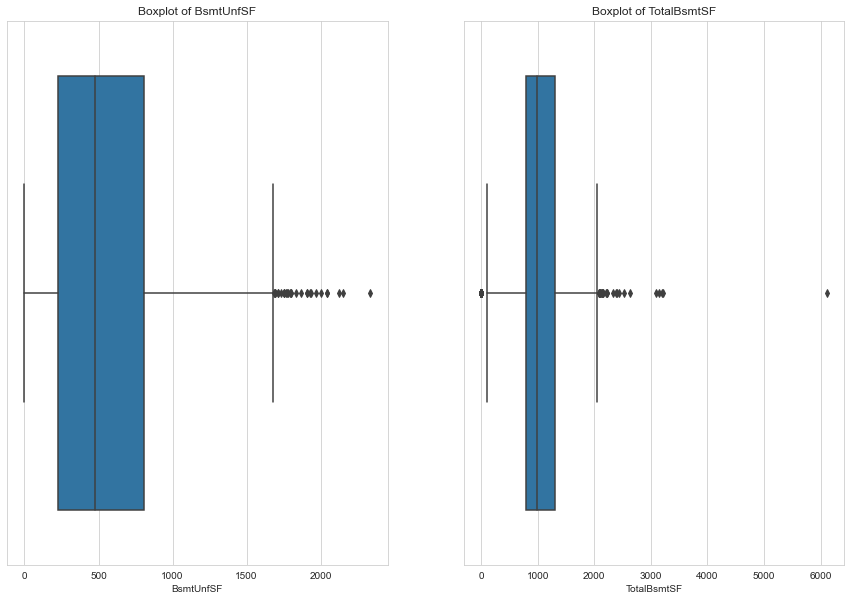

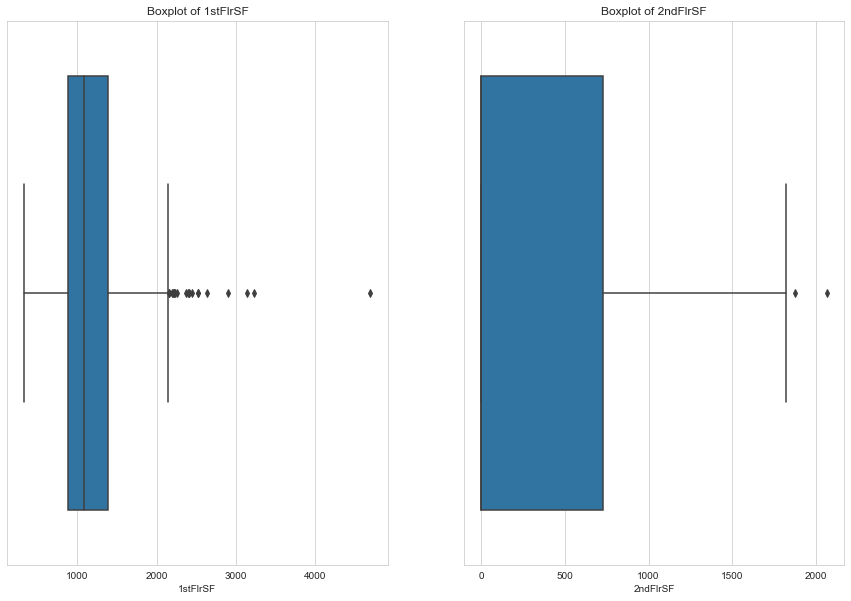

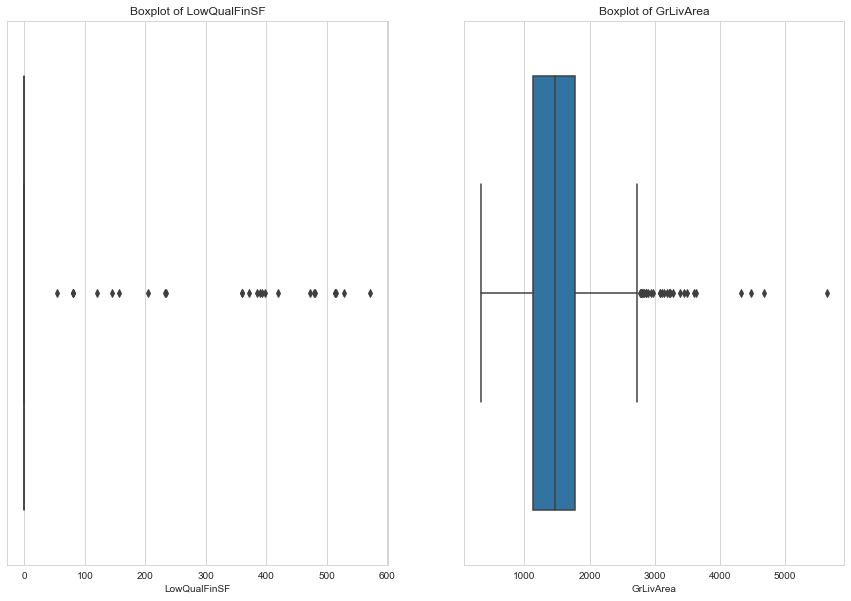

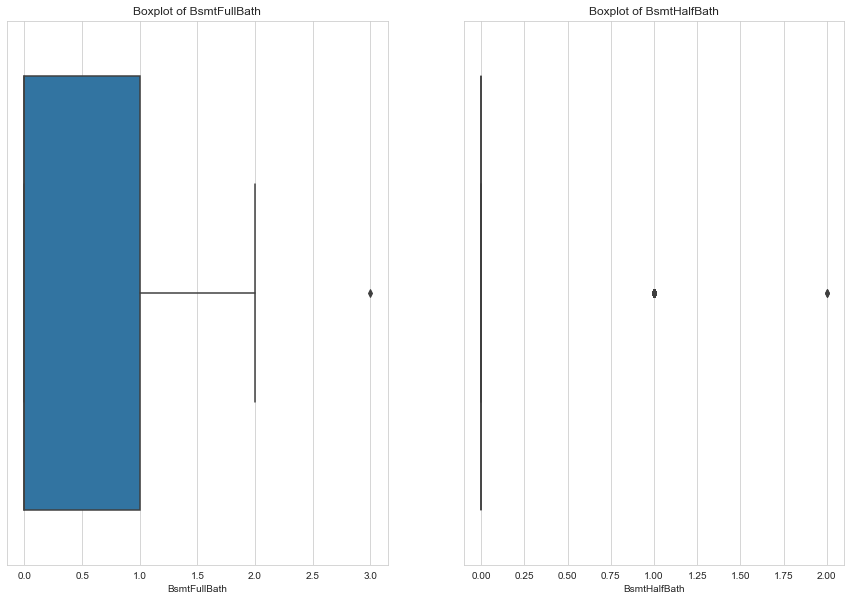

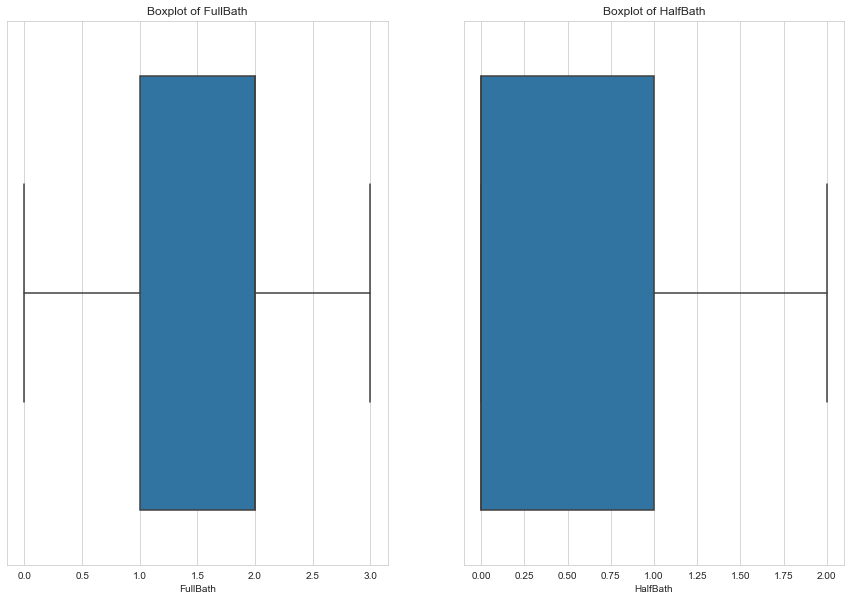

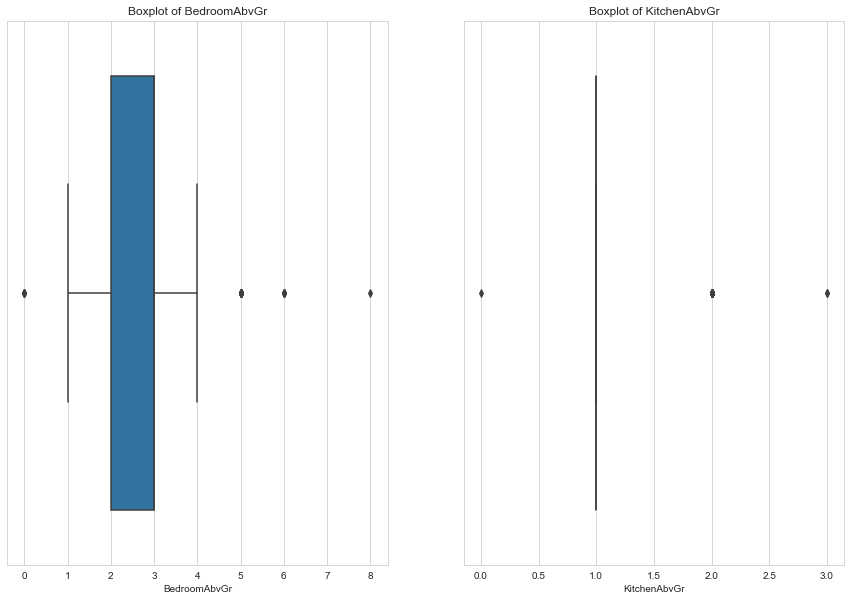

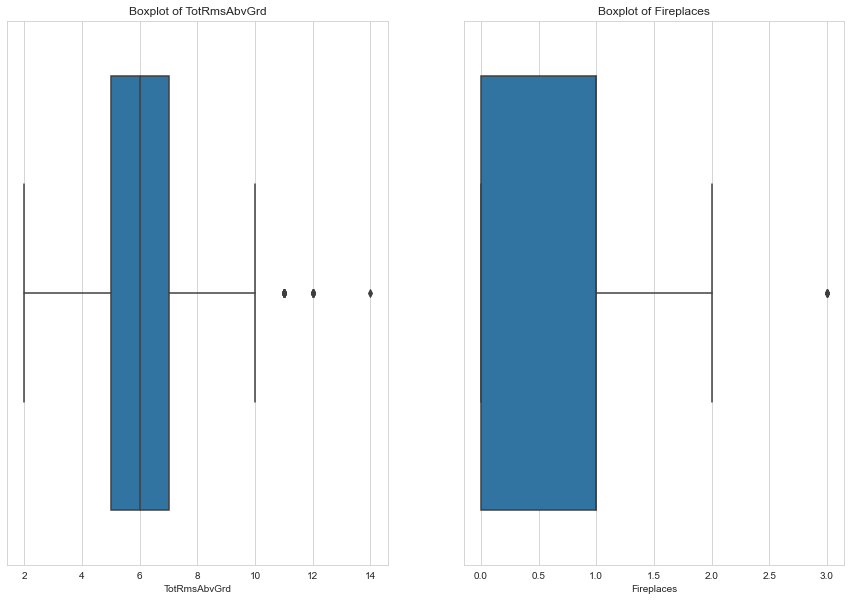

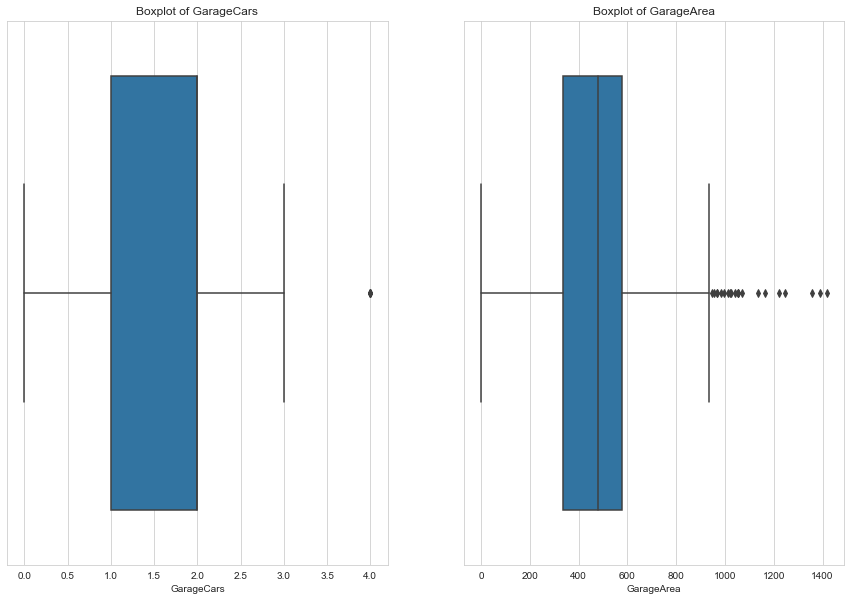

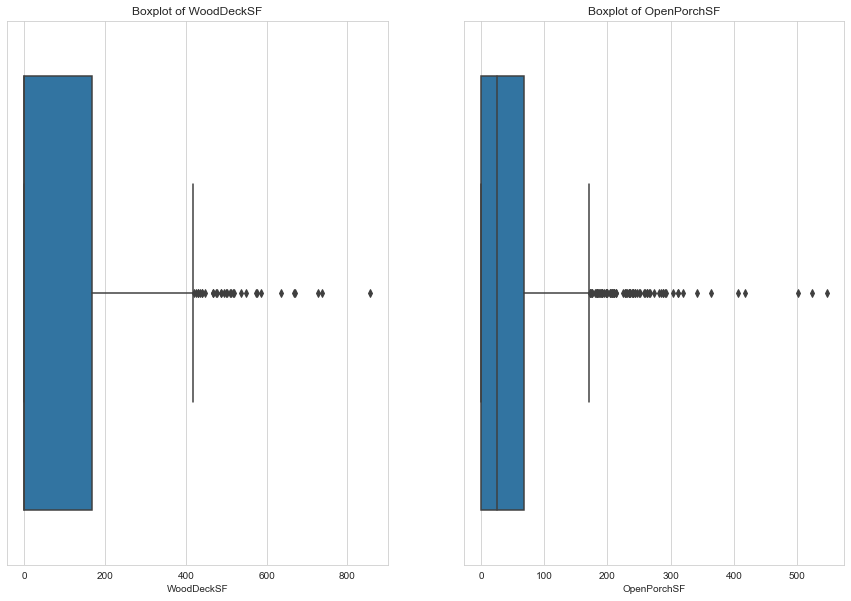

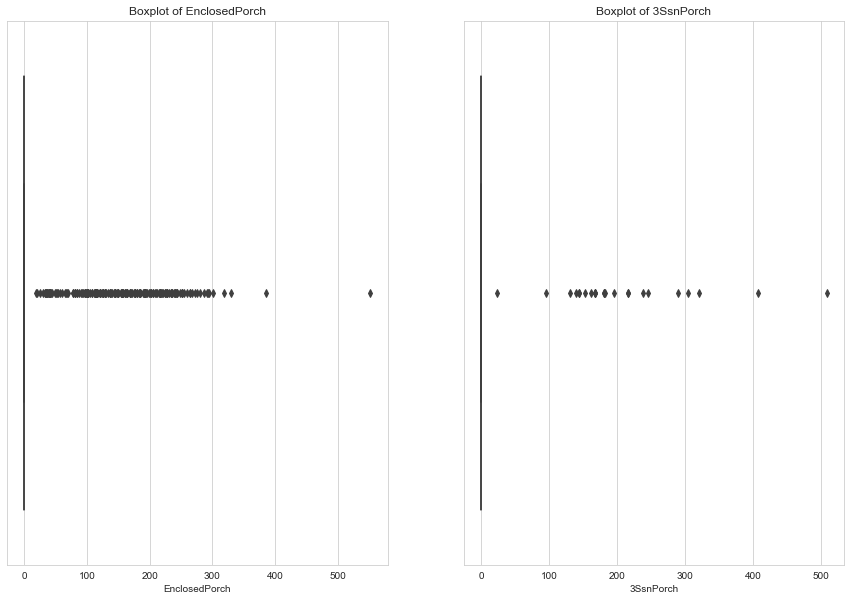

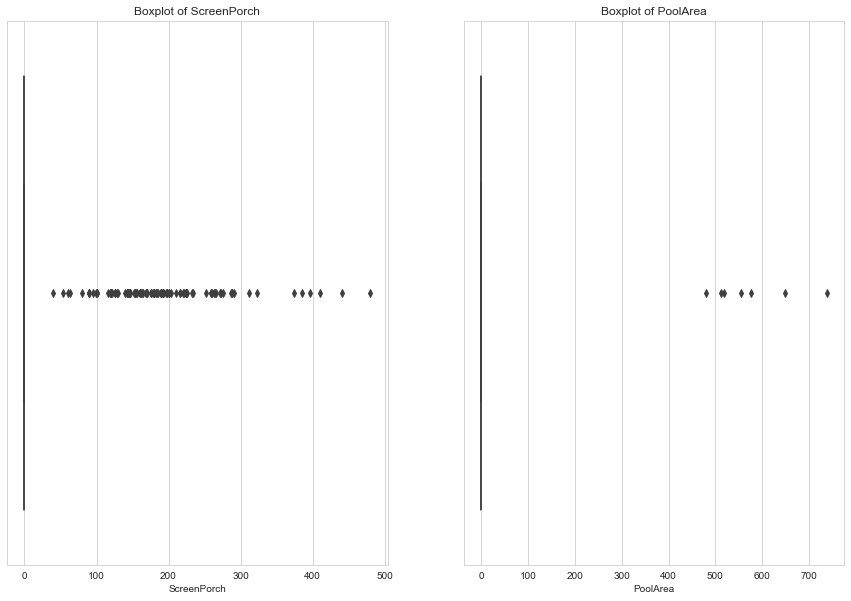

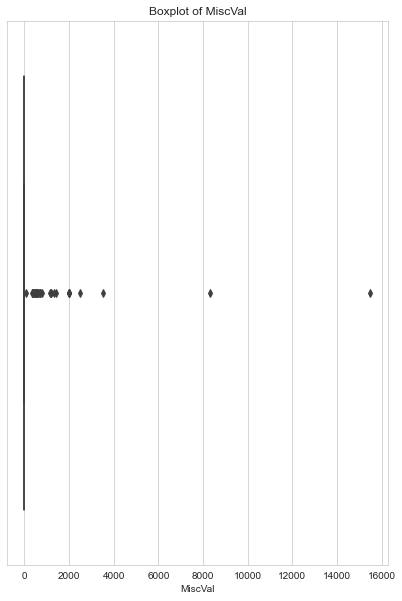

In [17]:
cols = temporal_features
for i in range(0, len(cols), 2):
    fig = plt.figure(figsize = (15, 10))
    ax1 = plt.subplot(1, 2, 1)
    ax1.set_title('Boxplot of {}'.format(cols[i]))
    sns.boxplot(x=cols[i], data=numeric_df, ax=ax1)
    if i + 1 < len(cols):
        ax2 = plt.subplot(1, 2, 2)
        ax2.set_title('Boxplot of {}'.format(cols[i+1]))
        sns.boxplot(x=cols[i+1], data=numeric_df, ax=ax2)

#### Quick Thoughts on boxplots

1. There seem to be many outliers in the features.
2. It is possible that missing values classified as zero's are bringing down the average, making there seem to be more outliers than there really are.

## Temporal Feature Exploration

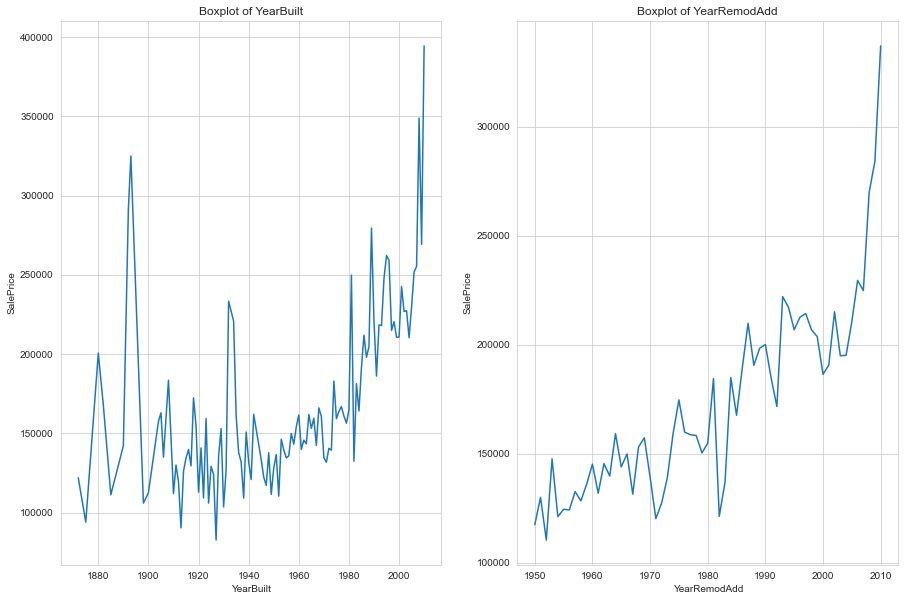

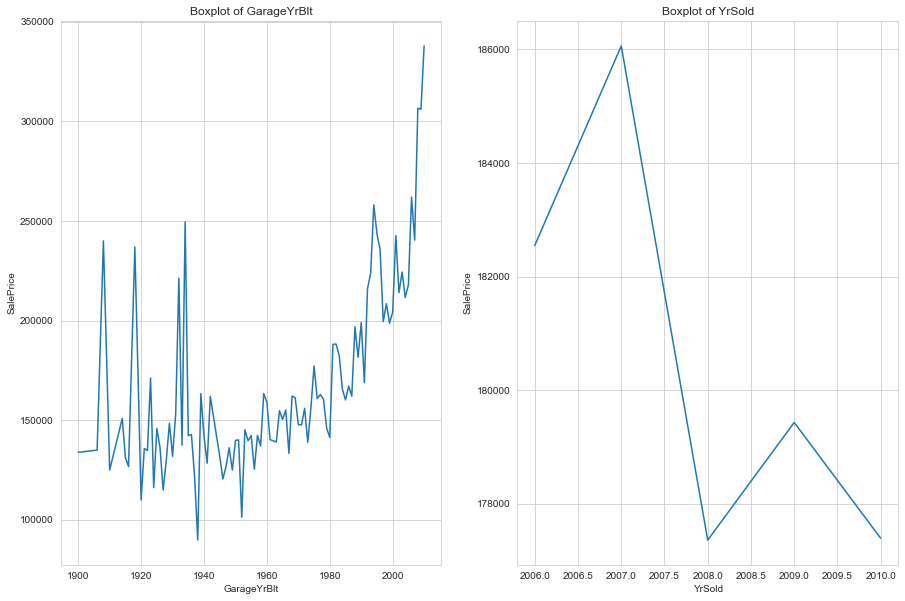

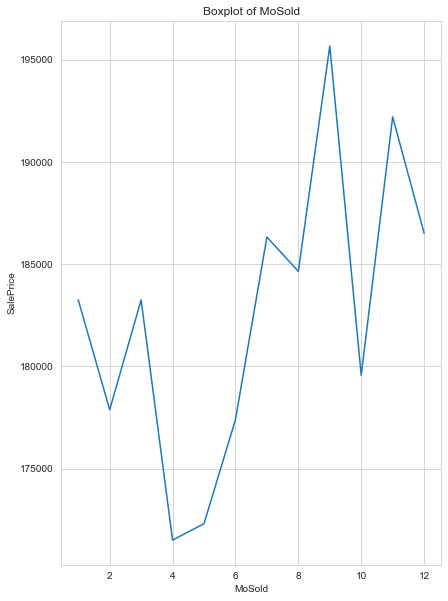

In [29]:
cols = temporal_features
for i in range(0, len(cols), 2):
    fig = plt.figure(figsize = (15, 10))
    ax1 = plt.subplot(1, 2, 1)
    ax1.set_title('Boxplot of {}'.format(cols[i]))
    sns.lineplot(x=cols[i], y='SalePrice', data=data, ax=ax1, ci=None)
    if i + 1 < len(cols):
        ax2 = plt.subplot(1, 2, 2)
        ax2.set_title('Boxplot of {}'.format(cols[i+1]))
        sns.lineplot(x=cols[i+1], y='SalePrice', data=data, ax=ax2, ci=None)

#### Quick thoughts

1. Most of the variables seem to perform as expected with SalePrice increasing as time passes.
2. SalePrice seems to decrease with respect to YrSold. This is most likely due to the 2008 housing crisis. So, we will need to think about whether we can use this feature or make it actually relavant

## Correlation Matrix

<AxesSubplot:title={'center':'Heatmap of correlation matrix'}>

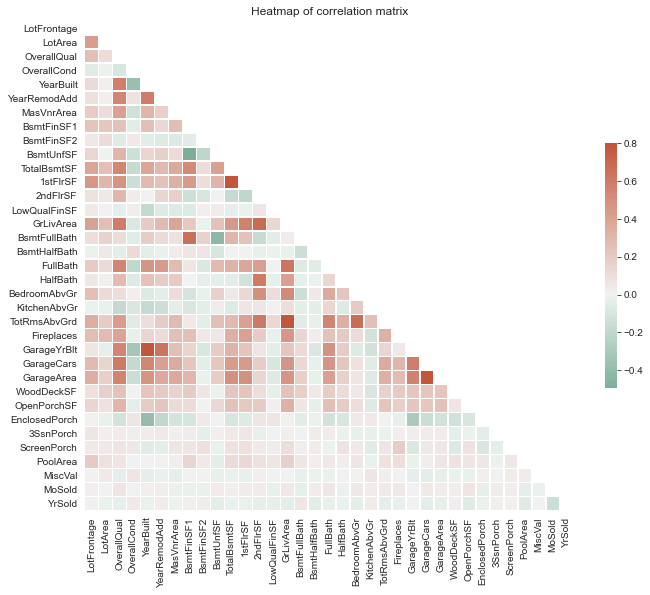

In [28]:
# Compute the correlation matrix
corr_data = data.copy()
corr_data.drop(['SalePrice', 'Id'], axis=1, inplace=True)
corr = corr_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Heatmap of correlation matrix')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Notes

Any correlation value above 0.35 - 0.4 is going to be detrimental to your model. Looking at our correlation matrix, is seems that there are atleast of few of the features with very high correlation. This means that we will have to deal with those features before any training.